# Sierra Leone Solar Data - Complete EDA

In [1]:
# Sierra Leone Solar Data - Complete EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully for Sierra Leone analysis!")

✅ Libraries imported successfully for Sierra Leone analysis!


In [2]:
# Load Sierra Leone data
df = pd.read_csv('../data/sierraleone-bumbuna.csv')

print("=== SIERRA LEONE DATA LOADED ===")
print(f"Dataset Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 3 rows:")
df.head(3)

=== SIERRA LEONE DATA LOADED ===
Dataset Shape: (525600, 19)
Columns: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']

First 3 rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [3]:
# Data Overview
print("=== DATA OVERVIEW ===")
print("Data Types:")
print(df.dtypes)
print("\nDataset Info:")
df.info()

# Missing Values Analysis
print("\n=== MISSING VALUES ANALYSIS ===")
missing_data = df.isna().sum()
missing_percent = (missing_data / len(df)) * 100
missing_report = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
missing_report[missing_report['Missing Count'] > 0]

=== DATA OVERVIEW ===
Data Types:
Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null 

,Missing Count,Missing Percentage
Comments,525600,100.0


In [4]:
# Summary Statistics
print("=== SUMMARY STATISTICS ===")
df.describe()

=== SUMMARY STATISTICS ===


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [5]:
# Outlier Detection using Z-score
print("=== OUTLIER DETECTION ===")

def detect_outliers_zscore(data, columns, threshold=3):
    outliers = {}
    for col in columns:
        if data[col].dtype in ['float64', 'int64']:
            z_scores = np.abs(stats.zscore(data[col].dropna()))
            outliers[col] = np.sum(z_scores > threshold)
    return outliers

key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'Tamb']
outliers_report = detect_outliers_zscore(df, key_columns)

print("Outliers detected (|Z| > 3):")
for col, count in outliers_report.items():
    print(f"  {col}: {count} outliers ({count/len(df)*100:.2f}%)")

=== OUTLIER DETECTION ===
Outliers detected (|Z| > 3):
  GHI: 2477 outliers (0.47%)
  DNI: 7586 outliers (1.44%)
  DHI: 2986 outliers (0.57%)
  ModA: 1604 outliers (0.31%)
  ModB: 2041 outliers (0.39%)
  WS: 3967 outliers (0.75%)
  WSgust: 3665 outliers (0.70%)
  Tamb: 192 outliers (0.04%)


In [6]:
# Data Cleaning
print("=== DATA CLEANING ===")
print(f"Original dataset shape: {df.shape}")

# Handle missing values
columns_to_impute = ['GHI', 'DNI', 'DHI', 'Tamb', 'WS', 'RH', 'BP']
for col in columns_to_impute:
    if col in df.columns and df[col].isna().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
        print(f"✅ Filled missing values in {col} with median")

# Remove outliers for key columns
initial_count = len(df)
for col in key_columns:
    if col in df.columns and outliers_report.get(col, 0) > 0:
        z_scores = np.abs(stats.zscore(df[col]))
        df = df[z_scores < 3]
        
print(f"✅ Removed {initial_count - len(df)} outlier rows")
print(f"Final dataset shape: {df.shape}")

=== DATA CLEANING ===
Original dataset shape: (525600, 19)
✅ Removed 20844 outlier rows
Final dataset shape: (504756, 19)


=== TIME SERIES ANALYSIS ===


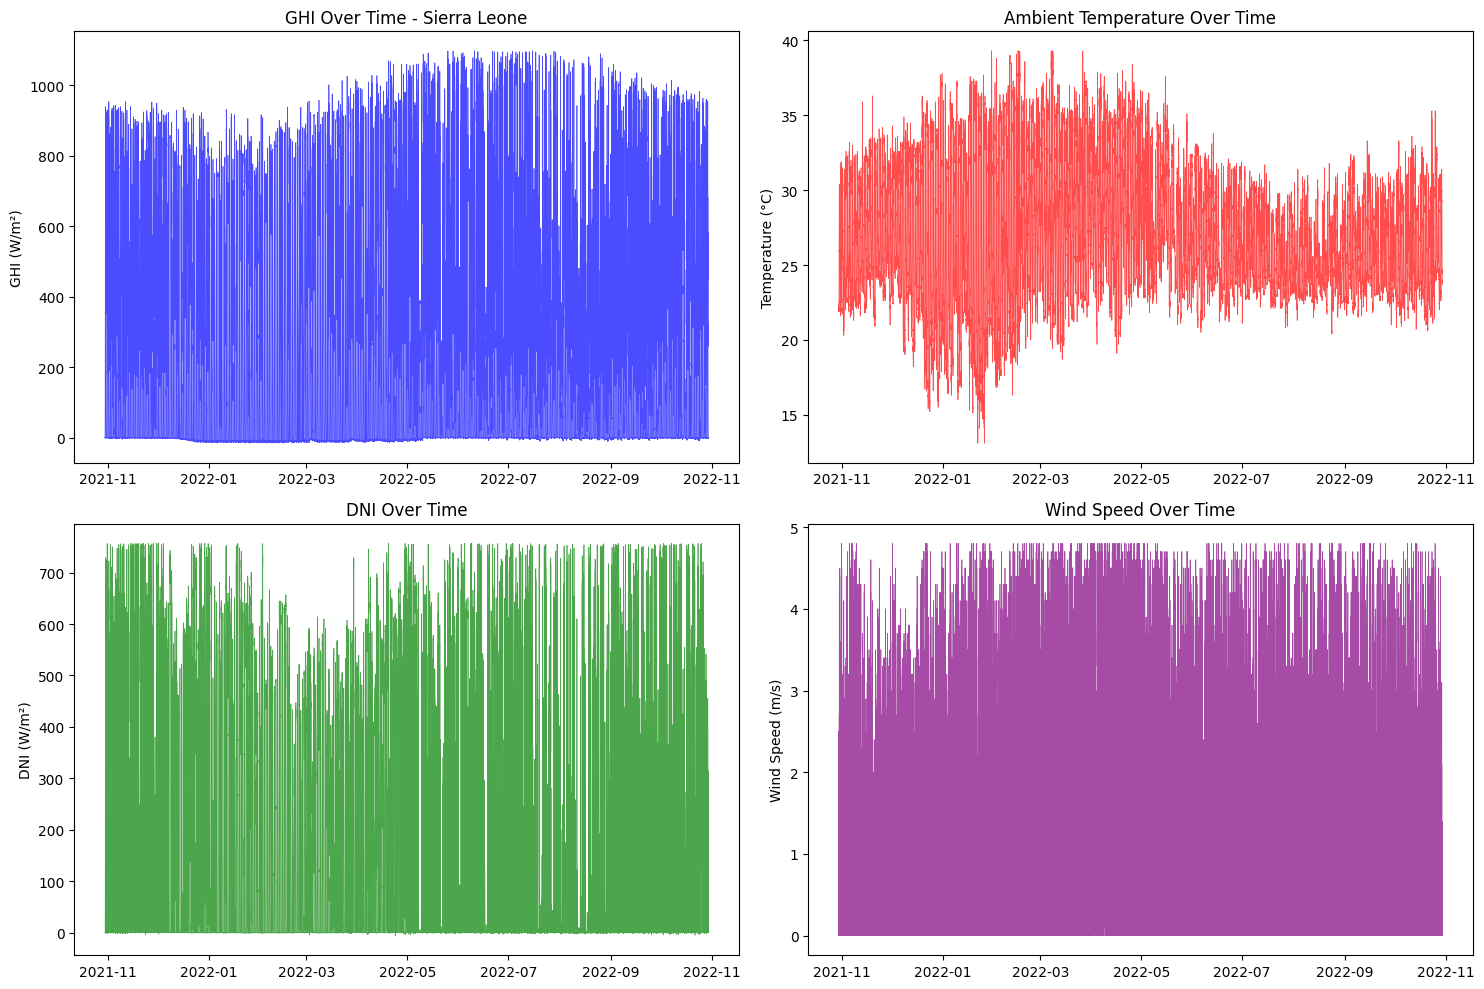

In [7]:
# Time Series Analysis
print("=== TIME SERIES ANALYSIS ===")

# Convert timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Month'] = df['Timestamp'].dt.month

# Create time series plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# GHI over time
axes[0,0].plot(df['Timestamp'], df['GHI'], alpha=0.7, linewidth=0.5, color='blue')
axes[0,0].set_title('GHI Over Time - Sierra Leone')
axes[0,0].set_ylabel('GHI (W/m²)')

# Temperature over time
axes[0,1].plot(df['Timestamp'], df['Tamb'], alpha=0.7, color='red', linewidth=0.5)
axes[0,1].set_title('Ambient Temperature Over Time')
axes[0,1].set_ylabel('Temperature (°C)')

# DNI over time
axes[1,0].plot(df['Timestamp'], df['DNI'], alpha=0.7, color='green', linewidth=0.5)
axes[1,0].set_title('DNI Over Time')
axes[1,0].set_ylabel('DNI (W/m²)')

# Wind Speed over time
axes[1,1].plot(df['Timestamp'], df['WS'], alpha=0.7, color='purple', linewidth=0.5)
axes[1,1].set_title('Wind Speed Over Time')
axes[1,1].set_ylabel('Wind Speed (m/s)')

plt.tight_layout()
plt.show()

=== DAILY PATTERNS ===


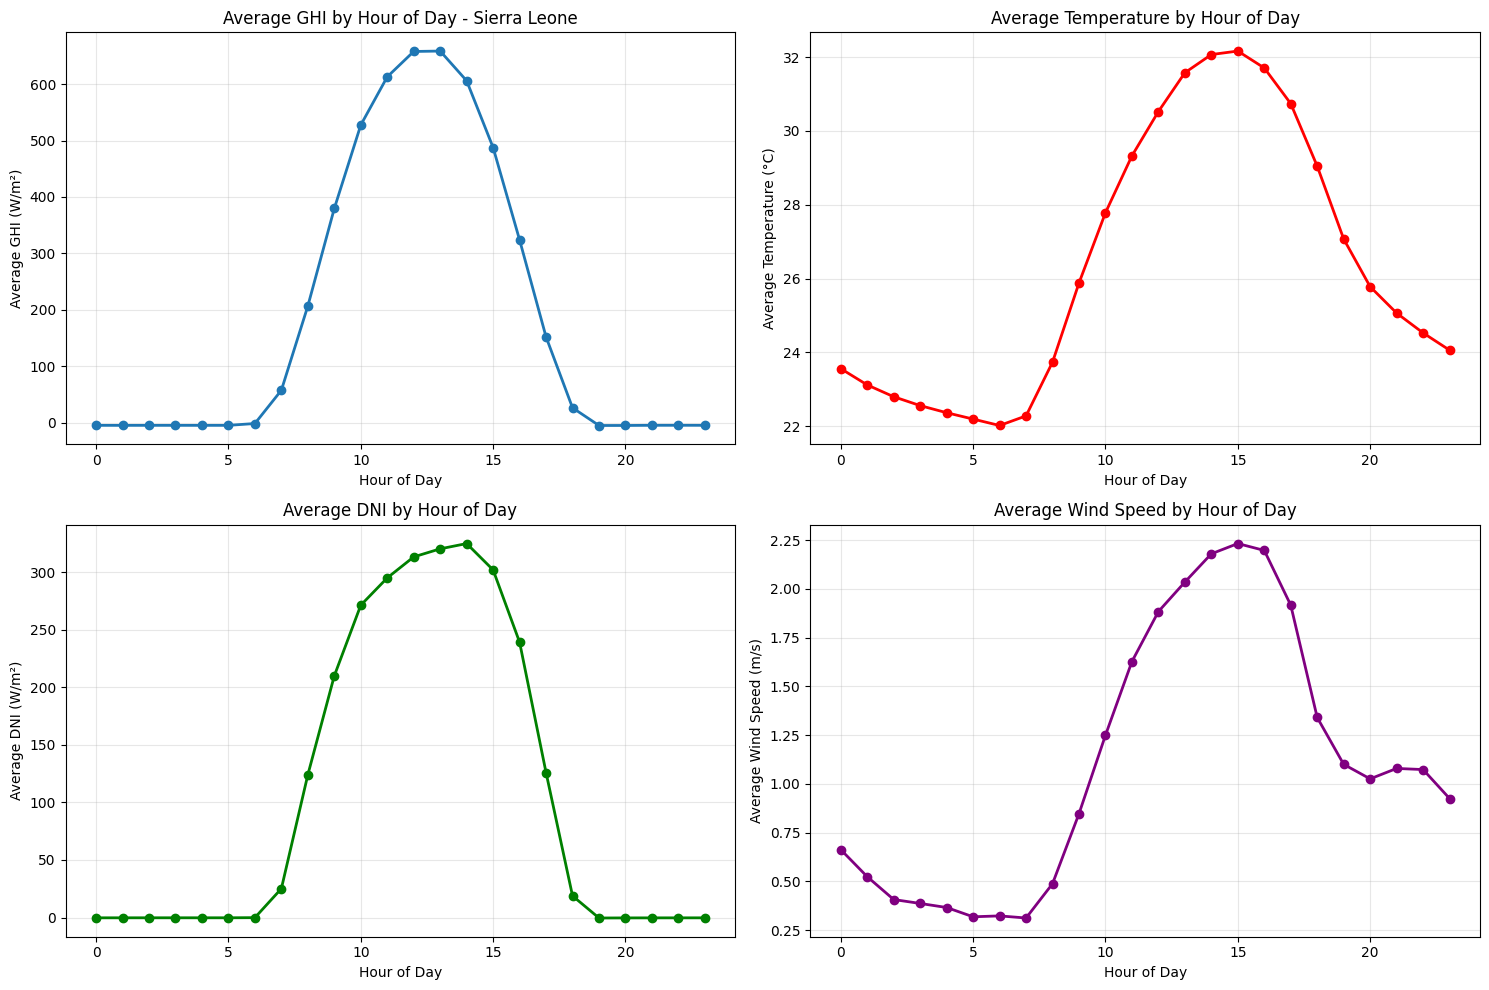

In [8]:
# Daily Patterns Analysis
print("=== DAILY PATTERNS ===")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# GHI by Hour
hourly_ghi = df.groupby('Hour')['GHI'].mean()
axes[0,0].plot(hourly_ghi.index, hourly_ghi.values, marker='o', linewidth=2)
axes[0,0].set_title('Average GHI by Hour of Day - Sierra Leone')
axes[0,0].set_xlabel('Hour of Day')
axes[0,0].set_ylabel('Average GHI (W/m²)')
axes[0,0].grid(True, alpha=0.3)

# Temperature by Hour
hourly_temp = df.groupby('Hour')['Tamb'].mean()
axes[0,1].plot(hourly_temp.index, hourly_temp.values, marker='o', color='red', linewidth=2)
axes[0,1].set_title('Average Temperature by Hour of Day')
axes[0,1].set_xlabel('Hour of Day')
axes[0,1].set_ylabel('Average Temperature (°C)')
axes[0,1].grid(True, alpha=0.3)

# DNI by Hour
hourly_dni = df.groupby('Hour')['DNI'].mean()
axes[1,0].plot(hourly_dni.index, hourly_dni.values, marker='o', color='green', linewidth=2)
axes[1,0].set_title('Average DNI by Hour of Day')
axes[1,0].set_xlabel('Hour of Day')
axes[1,0].set_ylabel('Average DNI (W/m²)')
axes[1,0].grid(True, alpha=0.3)

# Wind Speed by Hour
hourly_ws = df.groupby('Hour')['WS'].mean()
axes[1,1].plot(hourly_ws.index, hourly_ws.values, marker='o', color='purple', linewidth=2)
axes[1,1].set_title('Average Wind Speed by Hour of Day')
axes[1,1].set_xlabel('Hour of Day')
axes[1,1].set_ylabel('Average Wind Speed (m/s)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== CLEANING IMPACT ANALYSIS ===
Performance Metrics by Cleaning Status:


ModA              ModB               GHI
             mean      std     mean      std     mean
Cleaning                                             
0         185.023  276.561  177.068  264.675  180.345
1         272.408  162.690  276.470  161.944  284.826

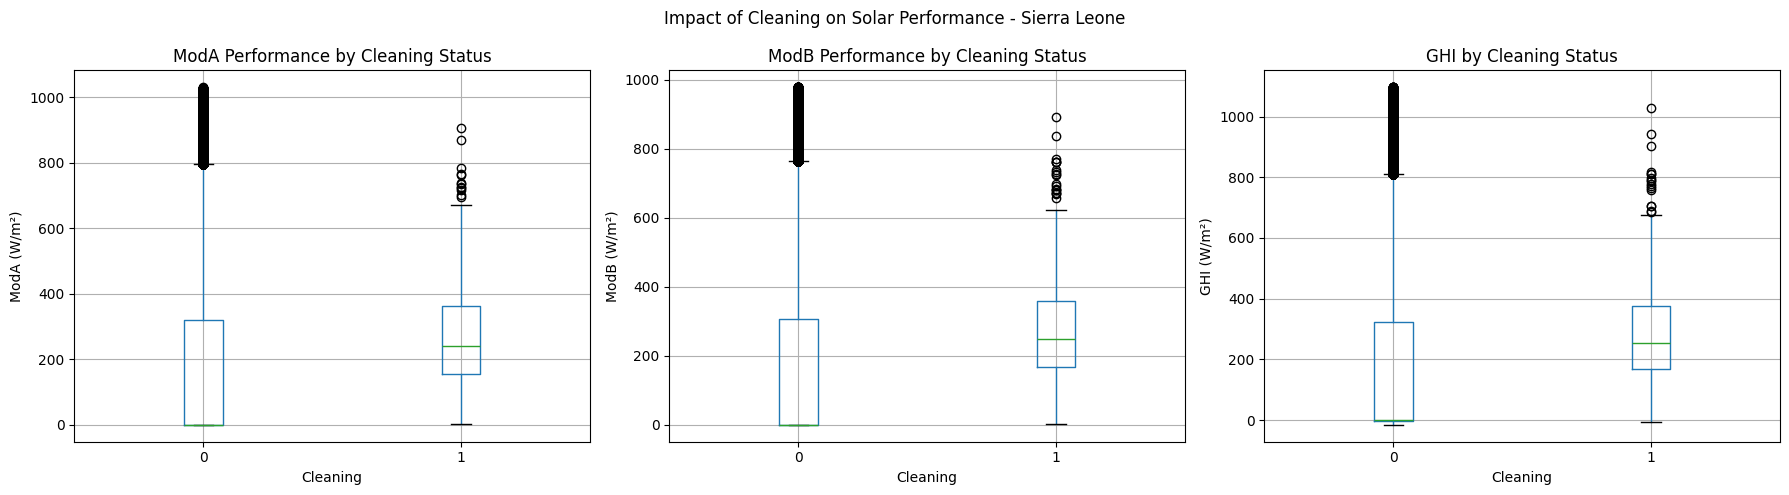

In [9]:
# Cleaning Impact Analysis
print("=== CLEANING IMPACT ANALYSIS ===")

if 'Cleaning' in df.columns:
    cleaning_impact = df.groupby('Cleaning').agg({
        'ModA': ['mean', 'std'],
        'ModB': ['mean', 'std'],
        'GHI': 'mean'
    }).round(3)
    
    print("Performance Metrics by Cleaning Status:")
    display(cleaning_impact)
    
    # Plot cleaning impact
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # ModA comparison
    df.boxplot(column='ModA', by='Cleaning', ax=axes[0])
    axes[0].set_title('ModA Performance by Cleaning Status')
    axes[0].set_ylabel('ModA (W/m²)')
    
    # ModB comparison
    df.boxplot(column='ModB', by='Cleaning', ax=axes[1])
    axes[1].set_title('ModB Performance by Cleaning Status')
    axes[1].set_ylabel('ModB (W/m²)')
    
    # GHI comparison
    df.boxplot(column='GHI', by='Cleaning', ax=axes[2])
    axes[2].set_title('GHI by Cleaning Status')
    axes[2].set_ylabel('GHI (W/m²)')
    
    plt.suptitle('Impact of Cleaning on Solar Performance - Sierra Leone')
    plt.tight_layout()
    plt.show()
else:
    print("No 'Cleaning' column found in dataset")

=== CORRELATION ANALYSIS ===


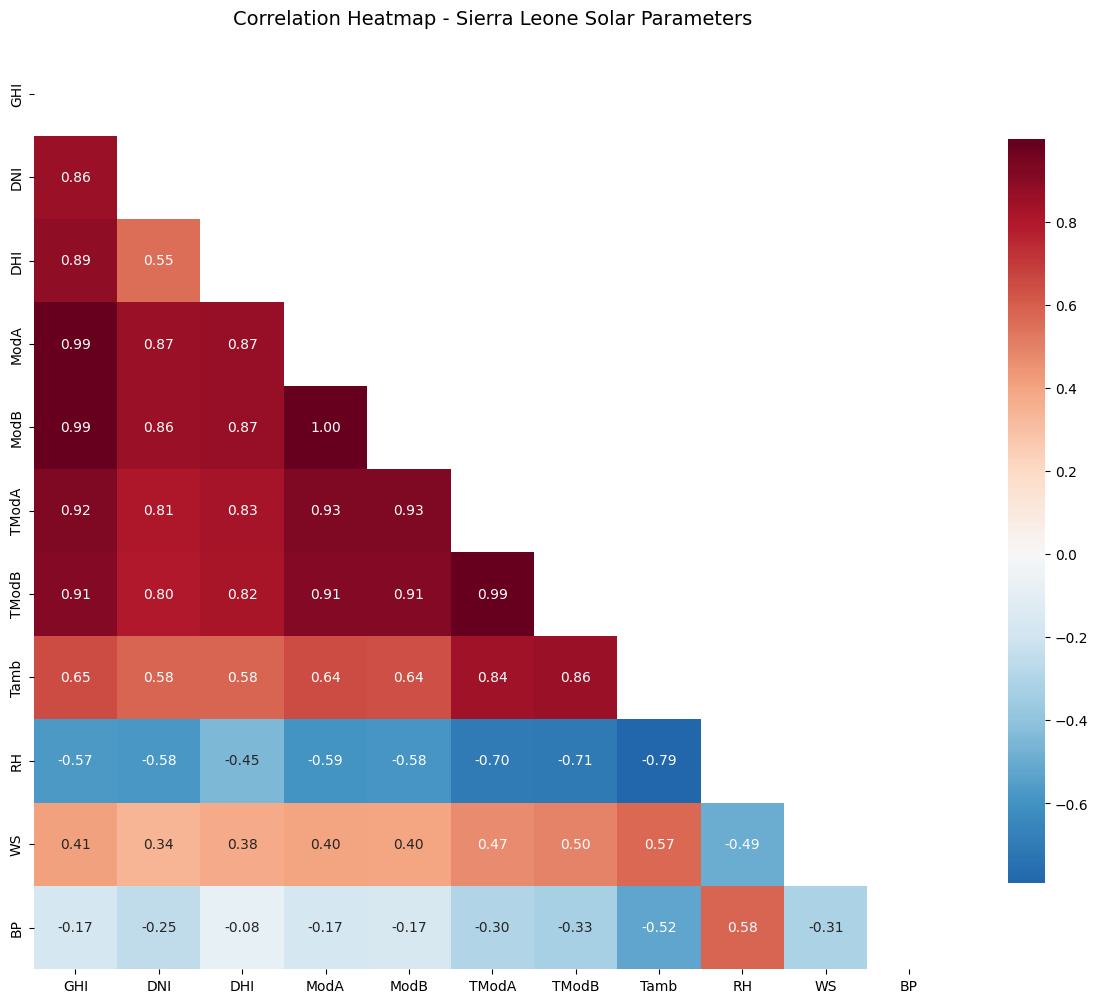


Top Correlations with GHI:
GHI      1.000000
ModA     0.994838
ModB     0.994566
TModA    0.924789
TModB    0.913055
DHI      0.885134
DNI      0.857554
Tamb     0.649451
WS       0.405815
BP      -0.169509
Name: GHI, dtype: float64


In [10]:
# Correlation Analysis
print("=== CORRELATION ANALYSIS ===")

# Select relevant columns for correlation
corr_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'TModA', 'TModB', 'Tamb', 'RH', 'WS', 'BP']
available_columns = [col for col in corr_columns if col in df.columns]

plt.figure(figsize=(12, 10))
correlation_matrix = df[available_columns].corr()

# Create heatmap with improved styling
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap - Sierra Leone Solar Parameters', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print("\nTop Correlations with GHI:")
ghi_correlations = correlation_matrix['GHI'].sort_values(ascending=False)
print(ghi_correlations.head(10))

=== RELATIONSHIP ANALYSIS ===


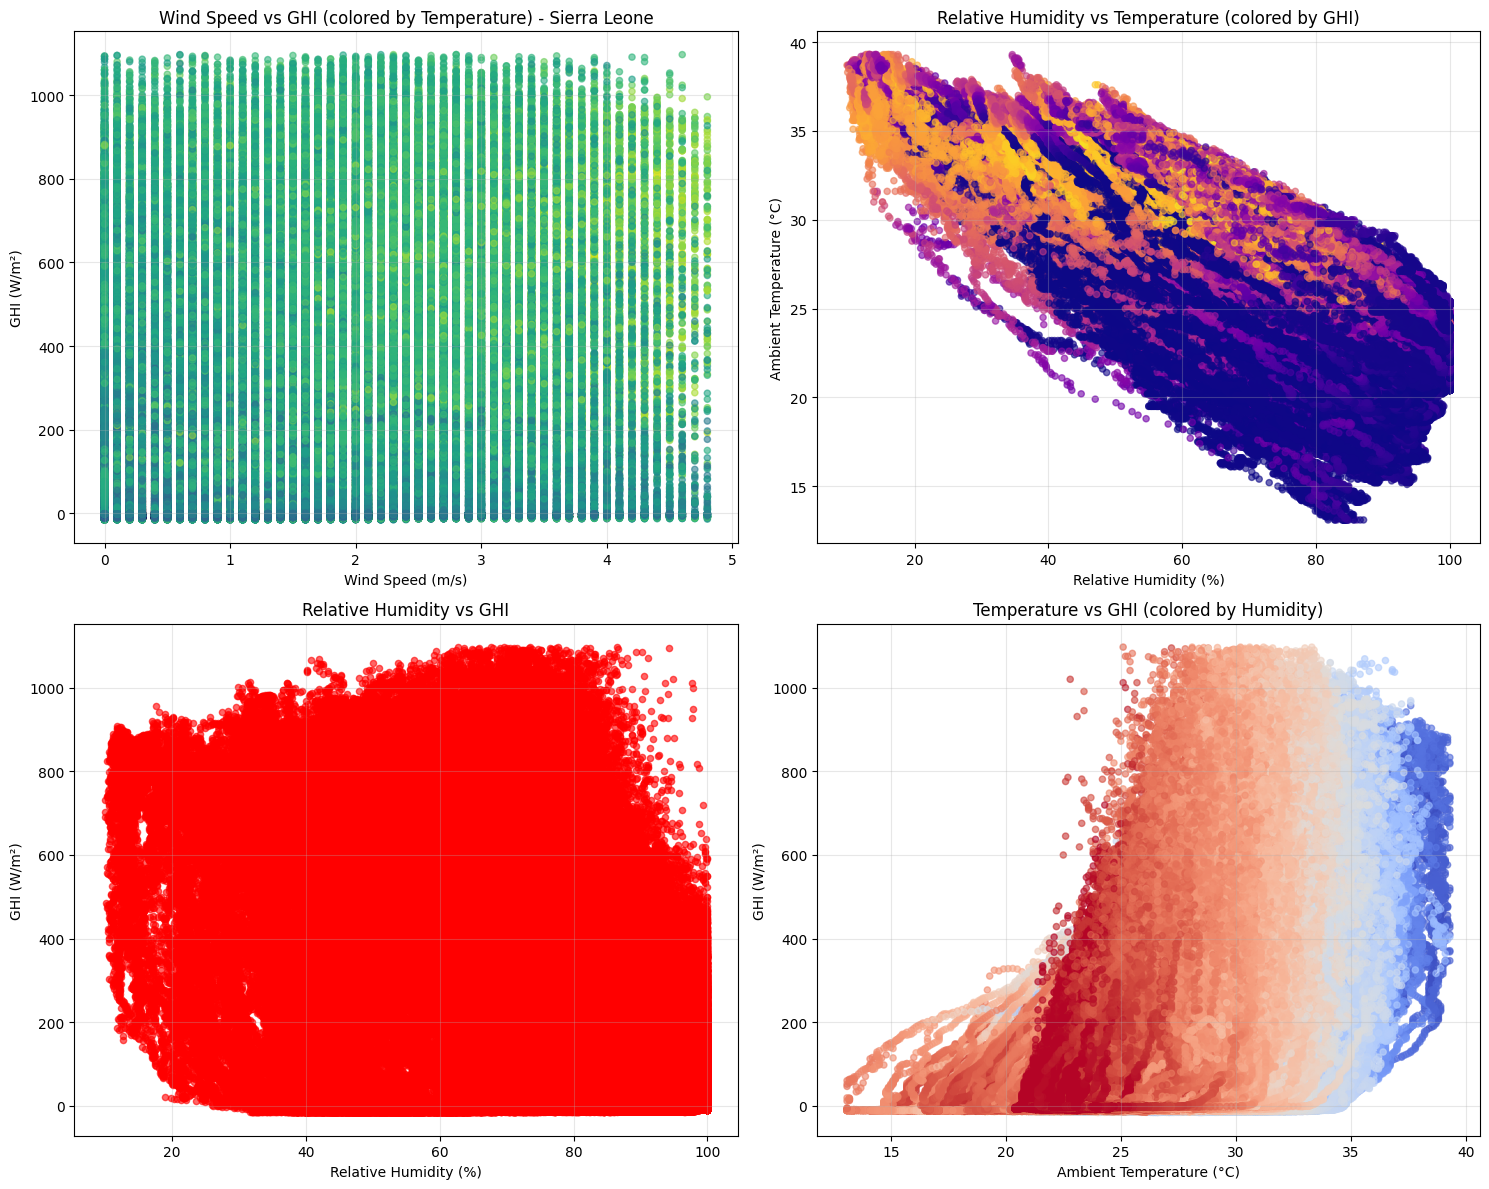

In [11]:
# Scatter Plots for Relationships
print("=== RELATIONSHIP ANALYSIS ===")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# WS vs GHI
axes[0,0].scatter(df['WS'], df['GHI'], alpha=0.6, s=20, c=df['Tamb'], cmap='viridis')
axes[0,0].set_xlabel('Wind Speed (m/s)')
axes[0,0].set_ylabel('GHI (W/m²)')
axes[0,0].set_title('Wind Speed vs GHI (colored by Temperature) - Sierra Leone')
axes[0,0].grid(True, alpha=0.3)

# RH vs Tamb
axes[0,1].scatter(df['RH'], df['Tamb'], alpha=0.6, s=20, c=df['GHI'], cmap='plasma')
axes[0,1].set_xlabel('Relative Humidity (%)')
axes[0,1].set_ylabel('Ambient Temperature (°C)')
axes[0,1].set_title('Relative Humidity vs Temperature (colored by GHI)')
axes[0,1].grid(True, alpha=0.3)

# RH vs GHI
axes[1,0].scatter(df['RH'], df['GHI'], alpha=0.6, s=20, color='red')
axes[1,0].set_xlabel('Relative Humidity (%)')
axes[1,0].set_ylabel('GHI (W/m²)')
axes[1,0].set_title('Relative Humidity vs GHI')
axes[1,0].grid(True, alpha=0.3)

# Temperature vs GHI
axes[1,1].scatter(df['Tamb'], df['GHI'], alpha=0.6, s=20, c=df['RH'], cmap='coolwarm')
axes[1,1].set_xlabel('Ambient Temperature (°C)')
axes[1,1].set_ylabel('GHI (W/m²)')
axes[1,1].set_title('Temperature vs GHI (colored by Humidity)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== WIND ANALYSIS ===


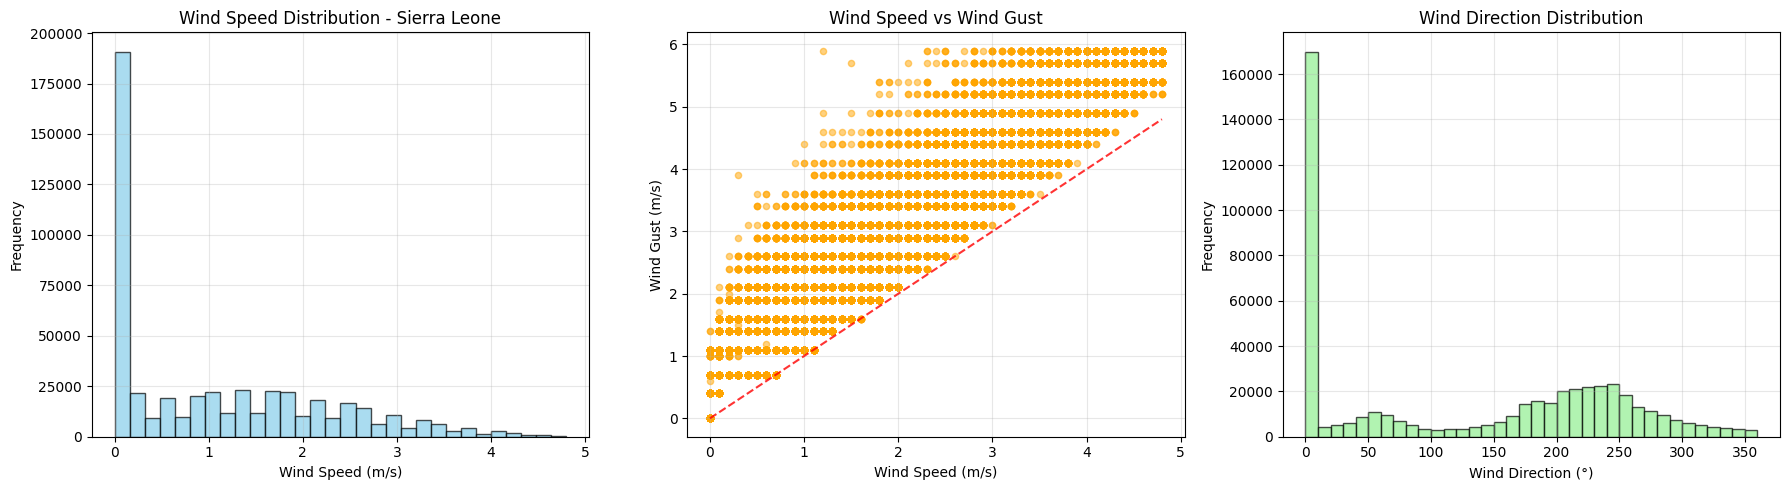

In [12]:
# Wind Analysis
print("=== WIND ANALYSIS ===")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Wind Speed Distribution
axes[0].hist(df['WS'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Wind Speed (m/s)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Wind Speed Distribution - Sierra Leone')
axes[0].grid(True, alpha=0.3)

# Wind Gust vs Regular Wind
axes[1].scatter(df['WS'], df['WSgust'], alpha=0.5, s=20, color='orange')
axes[1].set_xlabel('Wind Speed (m/s)')
axes[1].set_ylabel('Wind Gust (m/s)')
axes[1].set_title('Wind Speed vs Wind Gust')
axes[1].plot([df['WS'].min(), df['WS'].max()], [df['WS'].min(), df['WS'].max()], 'r--', alpha=0.8)
axes[1].grid(True, alpha=0.3)

# Wind Direction Analysis (if available)
if 'WD' in df.columns:
    axes[2].hist(df['WD'].dropna(), bins=36, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[2].set_xlabel('Wind Direction (°)')
    axes[2].set_ylabel('Frequency')
    axes[2].set_title('Wind Direction Distribution')
    axes[2].grid(True, alpha=0.3)
else:
    axes[2].text(0.5, 0.5, 'Wind Direction\nData Not Available', 
                horizontalalignment='center', verticalalignment='center',
                transform=axes[2].transAxes, fontsize=12)
    axes[2].set_title('Wind Direction Distribution')

plt.tight_layout()
plt.show()

=== DISTRIBUTION ANALYSIS ===


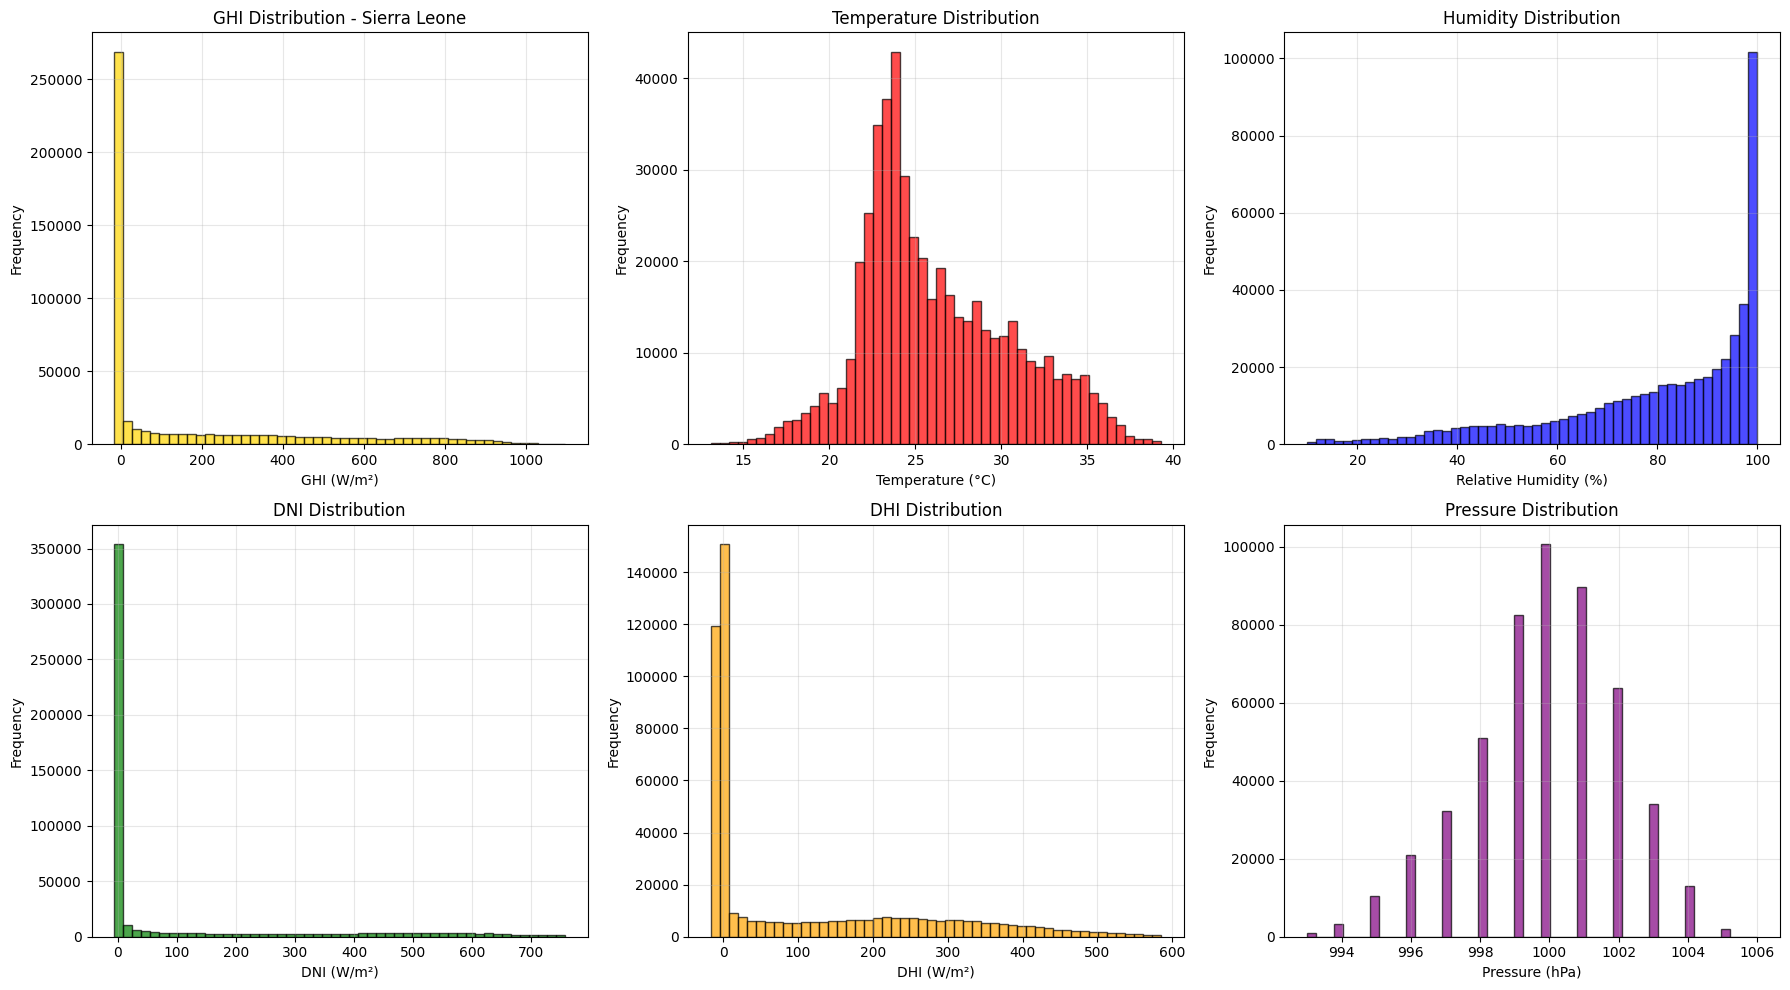

In [13]:
# Distribution Analysis
print("=== DISTRIBUTION ANALYSIS ===")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# GHI Distribution
axes[0,0].hist(df['GHI'], bins=50, alpha=0.7, color='gold', edgecolor='black')
axes[0,0].set_xlabel('GHI (W/m²)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('GHI Distribution - Sierra Leone')
axes[0,0].grid(True, alpha=0.3)

# Temperature Distribution
axes[0,1].hist(df['Tamb'], bins=50, alpha=0.7, color='red', edgecolor='black')
axes[0,1].set_xlabel('Temperature (°C)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Temperature Distribution')
axes[0,1].grid(True, alpha=0.3)

# Humidity Distribution
axes[0,2].hist(df['RH'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0,2].set_xlabel('Relative Humidity (%)')
axes[0,2].set_ylabel('Frequency')
axes[0,2].set_title('Humidity Distribution')
axes[0,2].grid(True, alpha=0.3)

# DNI Distribution
axes[1,0].hist(df['DNI'], bins=50, alpha=0.7, color='green', edgecolor='black')
axes[1,0].set_xlabel('DNI (W/m²)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('DNI Distribution')
axes[1,0].grid(True, alpha=0.3)

# DHI Distribution
axes[1,1].hist(df['DHI'], bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[1,1].set_xlabel('DHI (W/m²)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('DHI Distribution')
axes[1,1].grid(True, alpha=0.3)

# Pressure Distribution
axes[1,2].hist(df['BP'], bins=50, alpha=0.7, color='purple', edgecolor='black')
axes[1,2].set_xlabel('Pressure (hPa)')
axes[1,2].set_ylabel('Frequency')
axes[1,2].set_title('Pressure Distribution')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== BUBBLE CHART ANALYSIS ===


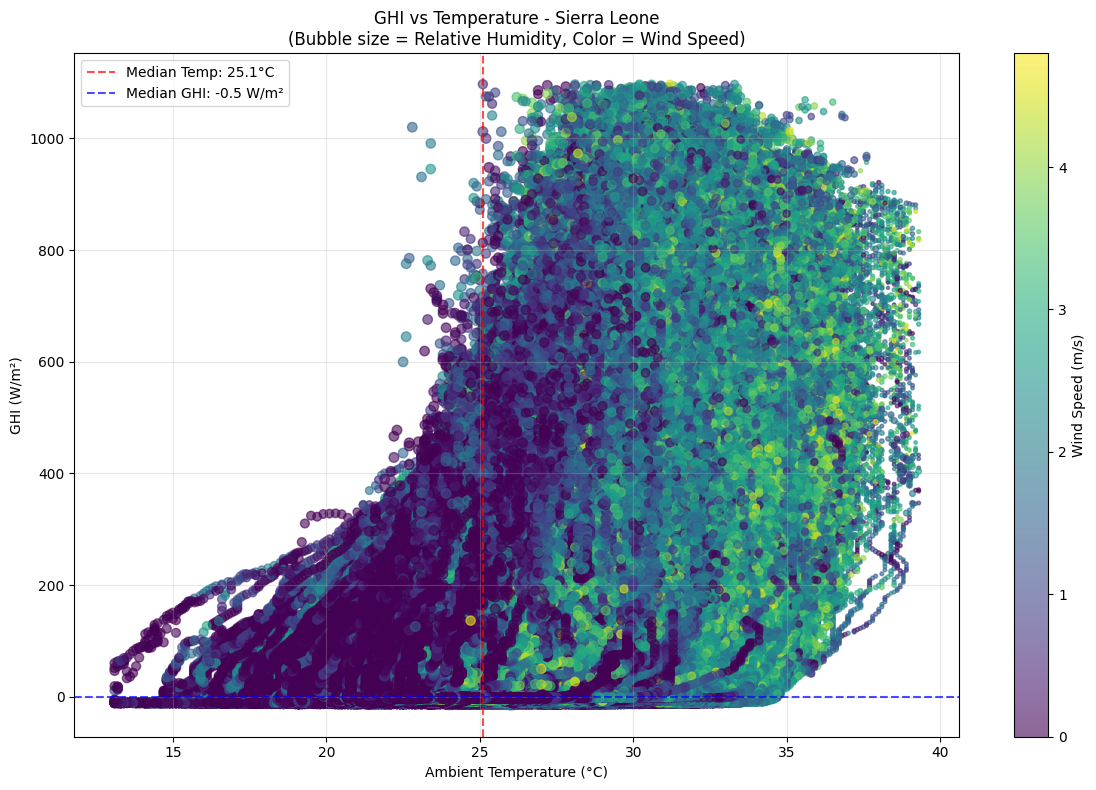

In [17]:
# Bubble Chart Analysis
print("=== BUBBLE CHART ANALYSIS ===")

plt.figure(figsize=(12, 8))

# Create bubble chart: GHI vs Temperature with bubble size = RH
scatter = plt.scatter(df['Tamb'], df['GHI'], 
                     s=df['RH']/2,  # Bubble size based on RH
                     c=df['WS'],    # Color based on Wind Speed
                     alpha=0.6, 
                     cmap='viridis')

plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs Temperature - Sierra Leone\n(Bubble size = Relative Humidity, Color = Wind Speed)')
plt.colorbar(scatter, label='Wind Speed (m/s)')

# Add reference lines for optimal conditions
plt.axvline(x=df['Tamb'].median(), color='red', linestyle='--', alpha=0.7, label=f"Median Temp: {df['Tamb'].median():.1f}°C")
plt.axhline(y=df['GHI'].median(), color='blue', linestyle='--', alpha=0.7, label=f"Median GHI: {df['GHI'].median():.1f} W/m²")

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [18]:
# Export Cleaned Data
print("=== EXPORT CLEANED DATA ===")

# Save cleaned dataset
cleaned_file_path = '../data/sierra_leone_clean.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"✅ Cleaned data saved to: {cleaned_file_path}")
print(f"✅ Final dataset shape: {df.shape}")
print(f"✅ Columns exported: {len(df.columns)}")

# Summary of cleaning operations
print("\n=== CLEANING SUMMARY ===")
print(f"• Final records: {len(df)}")
print(f"• Columns available: {list(df.columns)}")
print(f"• Data range: {df['Timestamp'].min()} to {df['Timestamp'].max()}")
print(f"• Key statistics:")
print(f"  - Average GHI: {df['GHI'].mean():.2f} W/m²")
print(f"  - Average Temperature: {df['Tamb'].mean():.2f} °C")
print(f"  - Average Humidity: {df['RH'].mean():.2f} %")

=== EXPORT CLEANED DATA ===
✅ Cleaned data saved to: ../data/sierra_leone_clean.csv
✅ Final dataset shape: (504756, 21)
✅ Columns exported: 21

=== CLEANING SUMMARY ===
• Final records: 504756
• Columns available: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments', 'Hour', 'Month']
• Data range: 2021-10-30 00:01:00 to 2022-10-30 00:00:00
• Key statistics:
  - Average GHI: 180.45 W/m²
  - Average Temperature: 26.18 °C
  - Average Humidity: 79.87 %


In [15]:
# Key Insights Summary
print("=== KEY INSIGHTS - SIERRA LEONE ===")

print("\n🔍 SOLAR POTENTIAL INSIGHTS:")
print(f"• Average GHI: {df['GHI'].mean():.2f} ± {df['GHI'].std():.2f} W/m²")
print(f"• Peak GHI (95th percentile): {df['GHI'].quantile(0.95):.2f} W/m²")
print(f"• Solar Consistency (GHI CV): {(df['GHI'].std() / df['GHI'].mean() * 100):.2f}%")

print("\n🌡️ ENVIRONMENTAL CONDITIONS:")
print(f"• Average Temperature: {df['Tamb'].mean():.2f} °C")
print(f"• Average Humidity: {df['RH'].mean():.2f} %")
print(f"• Average Wind Speed: {df['WS'].mean():.2f} m/s")

print("\n📈 STRONG CORRELATIONS:")
corr_with_ghi = df[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS']].corr()['GHI'].sort_values(ascending=False)
for param, corr in corr_with_ghi.items():
    if param != 'GHI' and abs(corr) > 0.3:
        print(f"• GHI vs {param}: {corr:.3f}")

print("\n💡 RECOMMENDATIONS FOR SIERRA LEONE:")
print("• Analyze GHI patterns for optimal solar farm placement")
print("• Consider temperature effects on panel efficiency")
print("• Monitor humidity impact on solar radiation quality")
print("• Evaluate wind patterns for potential hybrid energy systems")

=== KEY INSIGHTS - SIERRA LEONE ===

🔍 SOLAR POTENTIAL INSIGHTS:
• Average GHI: 180.45 ± 273.85 W/m²
• Peak GHI (95th percentile): 794.50 W/m²
• Solar Consistency (GHI CV): 151.76%

🌡️ ENVIRONMENTAL CONDITIONS:
• Average Temperature: 26.18 °C
• Average Humidity: 79.87 %
• Average Wind Speed: 1.08 m/s

📈 STRONG CORRELATIONS:
• GHI vs DHI: 0.885
• GHI vs DNI: 0.858
• GHI vs Tamb: 0.649
• GHI vs WS: 0.406
• GHI vs RH: -0.573

💡 RECOMMENDATIONS FOR SIERRA LEONE:
• Analyze GHI patterns for optimal solar farm placement
• Consider temperature effects on panel efficiency
• Monitor humidity impact on solar radiation quality
• Evaluate wind patterns for potential hybrid energy systems


In [16]:
# Final step - ready to commit
print("=== READY TO COMMIT ===")
print("✅ Sierra Leone EDA completed successfully!")
print("📁 Notebook: notebooks/sierra_leone_eda.ipynb")
print("📁 Cleaned data: data/sierra_leone_clean.csv")
print("\nNext steps:")
print("1. Save this notebook")
print("2. Run: git add notebooks/sierra_leone_eda.ipynb")
print("3. Run: git commit -m 'feat: complete Sierra Leone EDA analysis'")
print("4. Run: git push origin eda-sierra-leone")

=== READY TO COMMIT ===
✅ Sierra Leone EDA completed successfully!
📁 Notebook: notebooks/sierra_leone_eda.ipynb
📁 Cleaned data: data/sierra_leone_clean.csv

Next steps:
1. Save this notebook
2. Run: git add notebooks/sierra_leone_eda.ipynb
3. Run: git commit -m 'feat: complete Sierra Leone EDA analysis'
4. Run: git push origin eda-sierra-leone
